# Investigating unadjusted p-values from 0ppm vs 625ppm eQTL analysis

__Author:__ Bryan Quach  
__Date:__ April 28, 2017

### Estimated Analysis Time: <1 days

## Objective

There are multiple objectives of this analysis. Generally, the goal is to get a sense for expected results once multiple testing correction has been applied to the initial results. In a sense, we can consider the observations from this analysis as pre-liminary results. This analysis will address the following questions:

* How many total comparisons were done?
* How many genes were tested? How many markers were tested?
* What is the distribution of markers tested per gene?
* What is the p-value distribution of our results?
* Which gene and marker comparisons produced the most significant hits?

It is important to note that this analysis is for eQTL analysis results that used DESeq2 normalized (median ratio normalization) TPM values for lowly expressed gene filtering and for the expression phenotype.

## Software required

* [dplyr (R package)](https://cran.r-project.org/web/packages/dplyr/index.html)

## The Data

The data that we work with are results output from running a modified version of Daniel Oreper's eQTL analysis software. This software produces an R data file containing the environment in which the analysis was run, which includes a matrix of p-values with rows and columns corresponding to genes and markers respectively. In this analysis, we will look at results for the eQTL analyses in lung, liver, and kidney. The phenotype was the normalized expression differences between 625ppm and 0ppm BD treated CC mice.

## Calculating analysis statistics

### Lung

In [1]:
load("data/0ppm_vs_625ppm_lung.Rdata")

#Calculate total number of comparisons
total.runs.lung <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.lung <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.lung <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.lung <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.lung <- na.omit(as.numeric(unlist(out.mat)))

### Liver

In [2]:
load("data/0ppm_vs_625ppm_liver.Rdata")

#Calculate total number of comparisons
total.runs.liver <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.liver <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.liver <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.liver <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.liver <- na.omit(as.numeric(unlist(out.mat)))

### Kidney

In [3]:
load("data/0ppm_vs_625ppm_kidney.Rdata")

#Calculate total number of comparisons
total.runs.kidney <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.kidney <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.kidney <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.kidney <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.kidney <- na.omit(as.numeric(unlist(out.mat)))

## Plotting statistics

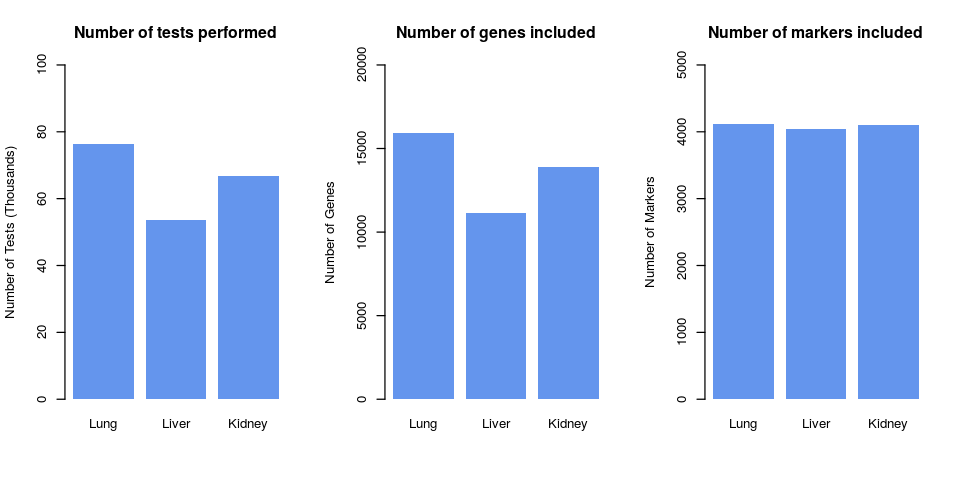

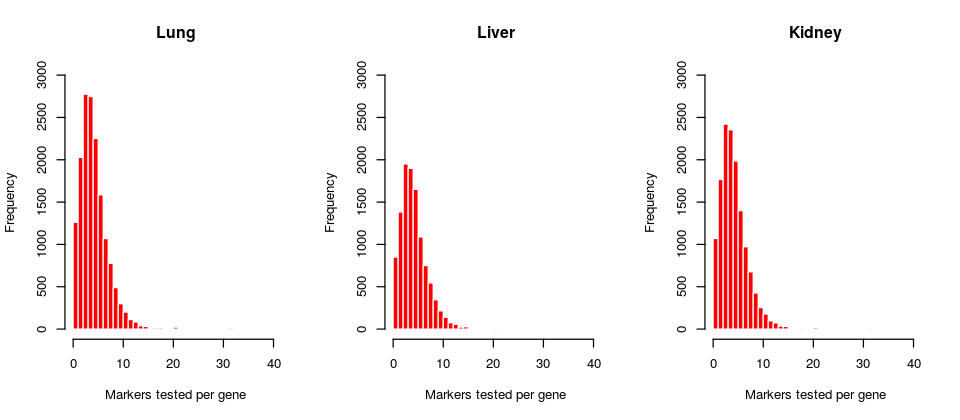

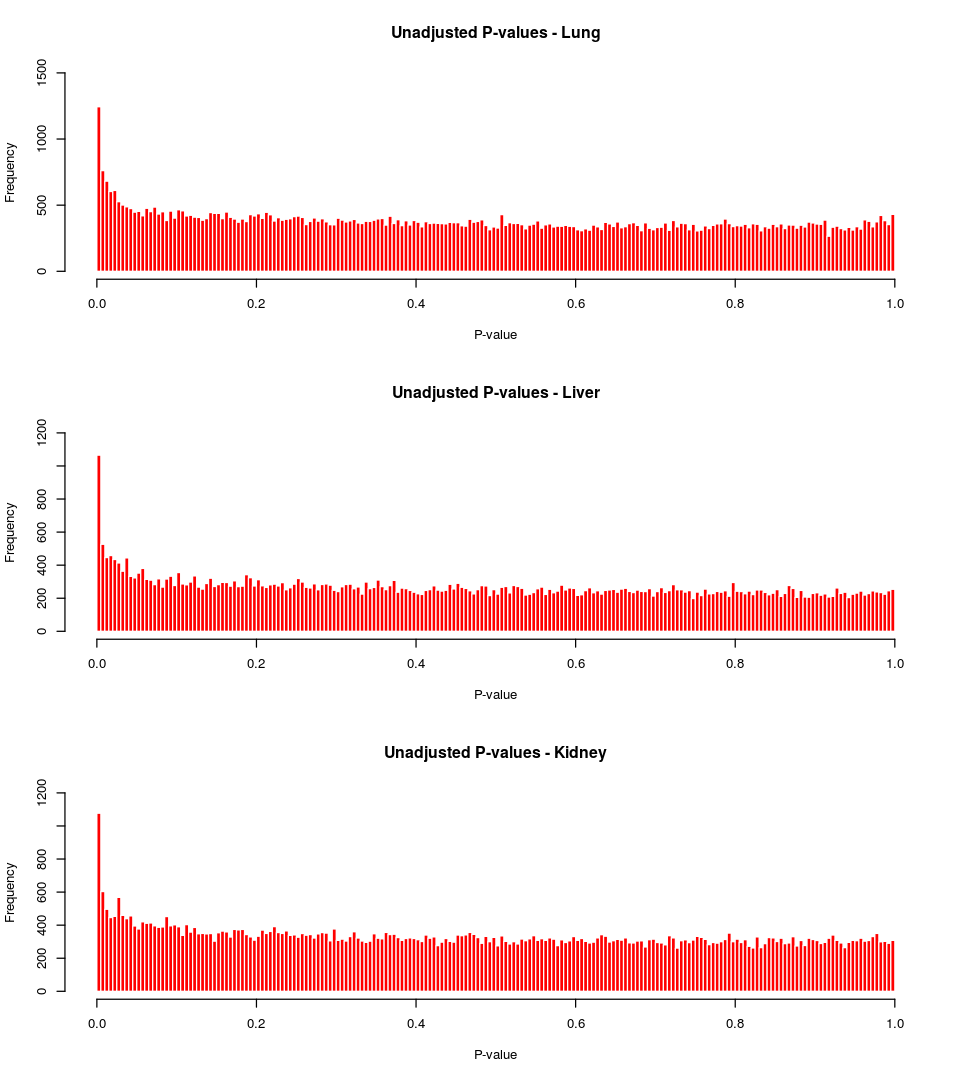

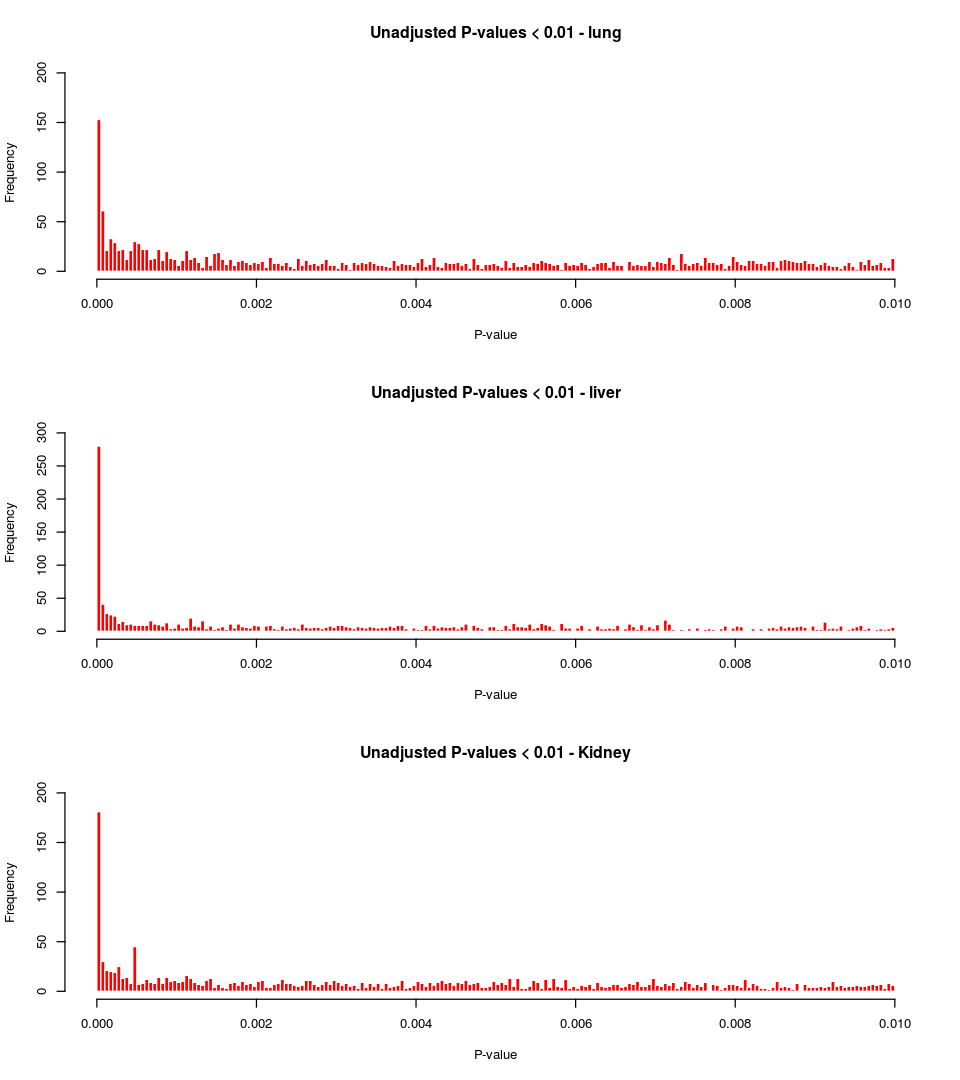

In [4]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)

total.runs <- c(total.runs.lung, total.runs.liver, total.runs.kidney)
num.genes.tested <- c(num.genes.tested.lung, num.genes.tested.liver, num.genes.tested.kidney)
num.markers.tested <- c(num.markers.tested.lung, num.markers.tested.liver, num.markers.tested.kidney)

#Number of tests, genes, and markers
par(mfrow=c(1,3))
barplot(height=total.runs/1000, beside=T, ylab="Number of Tests (Thousands)", ylim=c(0,100),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of tests performed")
barplot(height=num.genes.tested, beside=T, ylab="Number of Genes", ylim=c(0,20000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of genes included")
barplot(height=num.markers.tested, beside=T, ylab="Number of Markers", ylim=c(0,5000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of markers included")

#Markers per gene
options(repr.plot.width=8, repr.plot.height=3.5)
par(mfrow=c(1,3))
hist(m.per.gene.lung, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Lung",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.liver, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Liver",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.kidney, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Kidney",
     ylab="Frequency", 
     xlab="Markers tested per gene")

#P-value distributions
options(repr.plot.width=8, repr.plot.height=9)
par(mfrow=c(3,1))
hist(pvals.lung, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Lung",
     ylab="Frequency",
     xlab="P-value")
hist(pvals.liver, breaks=200, freq=T, ylim=c(0,1200), 
     col="red", border="white",
     main="Unadjusted P-values - Liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney, breaks=200, freq=T, ylim=c(0,1200), 
     col="red", border="white",
     main="Unadjusted P-values - Kidney",
     ylab="Frequency", 
     xlab="P-value")

par(mfrow=c(3,1))
hist(pvals.lung[which(pvals.lung < 0.01)], breaks=200, freq=T, ylim=c(0,200), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - lung",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.liver[which(pvals.liver < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney[which(pvals.kidney < 0.01)], breaks=200, freq=T, ylim=c(0,200), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - Kidney",
     ylab="Frequency", 
     xlab="P-value")


## Retrieving most significant tests

For each tissue, we retrieve the 100 gene-marker pairs that produced the most significant p-values and list them below.

In [5]:
library(dplyr)

# Function for searching p-value matrix
#
# Args:
#   needle - value to find
#   haystack - matrix to search through
#
# Returns a dataframe of the p-values with gene and marker names listed
find.value <- function(needle, haystack){
    hits <- which(haystack==needle, arr.ind=T)
    rnames <- rownames(haystack)[hits[,1]]
    cnames <- colnames(haystack)[hits[,2]]
    results <- c()
    for(i in 1:nrow(hits)){
        record <- c(rnames[i], cnames[i], needle)
        results <- rbind(results, record)
    }
    return(data.frame(results))
}

#Get p-value matrices for each tissue
load("data/0ppm_vs_625ppm_lung.Rdata")
matrix.lung <- out.mat
load("data/0ppm_vs_625ppm_liver.Rdata")
matrix.liver <- out.mat
load("data/0ppm_vs_625ppm_kidney.Rdata")
matrix.kidney <- out.mat


#Get top 100 p-values per tissue
top.lung <- sort(pvals.lung)[1:100]
top.liver <- sort(pvals.liver)[1:100]
top.kidney <- sort(pvals.kidney)[1:100]

#Create gene and marker list for significant hits
lung.list <- bind_rows(lapply(top.lung, function(x){find.value(x, matrix.lung)}))
liver.list <- bind_rows(lapply(top.liver, function(x){find.value(x, matrix.liver)}))
kidney.list <- bind_rows(lapply(top.kidney, function(x){find.value(x, matrix.kidney)}))
colnames(lung.list) <- c("Gene", "Marker", "P-value")
colnames(liver.list) <- c("Gene", "Marker", "P-value")
colnames(kidney.list) <- c("Gene", "Marker", "P-value")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”

In [6]:
#Display tables
cat("Lung\n")
lung.list
cat("Liver\n")
liver.list
cat("Kidney\n")
kidney.list

#Write tables to file
write.table(x=lung.list, file="results/lung_top100_hits_unadjusted_pvals_0_vs_625.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=liver.list, file="results/liver_top100_hits_unadjusted_pvals_0_vs_625.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=kidney.list, file="results/kidney_top100_hits_unadjusted_pvals_0_vs_625.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")

Lung


Gene          Marker                         P-value             
1   Dcps          UNC16139398.JAX00689916        5.42778103018061e-31
2   Ttc22         UNC7905375.UNC040215368        1.51558310244621e-19
3   Ttc22         JAX00122955.UNC7931463         2.1184104785551e-19 
4   Ttc22         UNC7913411.UNC7928876          2.13154211151821e-19
5   Ttc22         JAX00561354.JAX00561354        2.16735068829105e-19
6   Ttc22         UNC7932936.UNC7947729          2.33754703553716e-19
7   Marc1         UNC2346376.UNC2347788          3.19053905403569e-19
8   Marc1         UNC2343495.JAX00278921         3.29824920259672e-19
9   Marc1         UNC2345938.JAX00278925         3.2984217864646e-19 
10  Marc1         UNC2348110.UNC2349761          3.50156968302891e-19
11  Oaf           JAX00691903.UNC16275832        5.96172451841308e-19
12  Marc1         UNC2352059.UNC2363161          8.81744893727489e-19
13  Marc1         UNC2363410.UNC2365651          1.6338160766495e-18 
14  Oaf           UNC16230132.UNC16253527        2.0698872064698e-18 
15  2810403A07Rik UNC5722551.backupJAX00110129   3.95231296393233e-16
16  2810403A07Rik UNC5732520.UNC5752814          5.63523189412964e-16
17  2810403A07Rik UNC5682922.UNC5721856          5.93300499941775e-16
18  Stox2         UNC14668571.UNC14672107        3.76305788825709e-15
19  Stox2         JAX00667796.JAX00161517        4.97840058905496e-15
20  Stox2         UNC14679166.UNC_rs49846602     6.34626829521337e-15
21  Stox2         UNC14682899.JAX00668007        6.68744978133796e-15
22  Stox2         UNC14686674.UNC14692700        6.91123887766787e-15
23  Riok3         UNC28702402.UNC181063332       1.72655516452706e-12
24  Serpina3h     UNC21786436.UNC21786664        1.70754603639706e-11
25  Adam23        UNC790025.UNC791840            2.81881585711198e-11
26  Adam23        UNC_rs31392164.UNC802071       3.87800985899373e-11
27  Adam23        UNC792051.UNC795596            3.89385300172545e-11
28  Serpina1e     UNC21786436.UNC21786664        4.62101960993572e-10
29  Gm3383        JAX00049708.JAX00372110        5.47761319590285e-10
30  Tbc1d24       JAX00433060.B6_17_023744030_S  7.3854456941362e-10 
⋮   ⋮             ⋮                              ⋮                   
71  Nuf2          UNC2158883.UNC2165985          2.62103536157508e-07
72  Cmtm4         UNC15422872.UNC15460754        3.2158505811522e-07 
73  Mc5r          JAX00463560.UNC29521244        3.2642412133391e-07 
74  Cmtm4         UNC15417874.UNC15422538        3.56427804555428e-07
75  Tc2n          UNC21763677.UNC21772961        4.45133957740701e-07
76  Ces2b         UNC15401027.JAX00679070        7.43965136484461e-07
77  Ces2b         UNC15416961.JAX00679081        9.99087046974217e-07
78  Mc5r          UNC29508829.JAX00084655        1.13553659550286e-06
79  Dlc1          UNC14505600.backupUNC080144868 1.23791041111549e-06
80  Mc5r          UNC29493783.UNC29500011        1.53534266842157e-06
81  Cyp2b13       UNC12514662.JAX00149482        1.96396134280538e-06
82  Rrp15         UNC2373664.UNC2375202          2.05950710489362e-06
83  Cyp2b13       UNC12512623.UNC12514434        2.15654793009416e-06
84  Mc5r          UNC29505651.UNC29505806        2.29172853756294e-06
85  Rrp15         JAX00013725.UNC2390835         2.29859364227123e-06
86  Mc5r          UNC29500627.UNC180151602       2.31547191387573e-06
87  Mc5r          UNC29506315.UNC29508663        2.3555926660675e-06 
88  Rrp15         UNC2390966.JAX00279668         3.29577206895828e-06
89  Rrp15         UNC2391711.JAX00279780         3.29832669221927e-06
90  Ethe1         backupJAX00633478.UNC12510962  3.99934425181135e-06
91  Zfp608        UNC29311166.UNC29313777        4.41633813521373e-06
92  Serpine1      UNC10247043.UNC10251963        4.70793562410996e-06
93  Cyp2b13       UNC12521377.UNC12521377        4.77005810728166e-06
94  Osgep         UNC23990985.backupUNC140394528 4.92203840060278e-06
95  Lhfpl3        UNC8769425.UNC8791233          5.05991952258692e-06
96  Mettl7a2  

Liver


Gene          Marker                        P-value              
1   Pbx3          UNC2862710.UNC2910745         8.04758024330797e-104
2   Pbx3          UNC2845901.UNC2862042         9.74548640875421e-104
3   Ppard         UNC27723571.UNC27725690       5.32616813466224e-94 
4   Ppard         UNC27722978.UNC27723391       5.75824422615847e-94 
5   Ppard         UNC170301400.JAX00434785      5.99744923722872e-94 
6   Ppard         UNC27722618.UNC27722769       8.42891507332574e-94 
7   Hist1h2bl     UNC22234794.UNC22263112       1.19063569931589e-69 
8   Arhgef25      UNC18933797.JAX00023513       1.6091522048084e-59  
9   Arhgef25      UNC18954024.UNC18954348       1.91809271633611e-59 
10  Arhgef25      UNC18954707.UNC18961845       2.00204669530274e-59 
11  Arhgef25      JAX00302230.UNC18963675       4.0821705988508e-59  
12  Arhgef25      UNC18963682.JAX00302406       4.0846159559696e-59  
13  Fhl1          UNC200056198.JAX00712044      2.64345374681546e-50 
14  Fhl1          JAX00179390.UNC30852286       2.75833592962734e-50 
15  Tspan31       JAX00302230.UNC18963675       3.31011462422241e-50 
16  Tspan31       UNC18963682.JAX00302406       3.68515709576949e-50 
17  Tspan31       UNC18954707.UNC18961845       3.91769487715815e-50 
18  Tspan31       UNC18954024.UNC18954348       4.18310043785834e-50 
19  Tspan31       UNC18933797.JAX00023513       4.6130489511923e-50  
20  Mir6340       UNC4537733.UNC4540317         1.07503173952115e-43 
21  Mir6340       UNC4536843.UNC4537497         1.11103124427103e-43 
22  Mir6340       UNC4531549.UNC4536733         1.58318068834281e-43 
23  Mir6340       UNC4540460.UNC4545629         9.39016239589802e-43 
24  E2f7          UNC18700285.UNC18708909       4.4029394819268e-34  
25  E2f7          UNC18709522.JAX00298756       4.5092916781584e-34  
26  E2f7          UNC18711529.UNC18712902       4.56283850424577e-34 
27  E2f7          JAX00022312.UNC18739738       5.02536052688038e-34 
28  E2f7          JAX00022117.UNC18699971       6.02770801899295e-34 
29  Fhl1          JAX00179414.JAX00712149       1.03175825070769e-32 
30  Nme4          UNC27694572.UNC27714988       3.78019470816126e-27 
⋮   ⋮             ⋮                             ⋮                    
71  Dyrk2         UNC18830967.UNC18835853       1.91206170718405e-11 
72  Dyrk2         JAX00022960.UNC18837179       2.19619609080767e-11 
73  Dyrk2         UNC18837573.UNC18838329       2.48171668447797e-11 
74  Dyrk2         UNC18838853.UNC18839122       2.51148155558909e-11 
75  Dyrk2         UNC18791150.UNC18820326       2.70192151540797e-11 
76  Zfp54         JAX00433060.B6_17_023744030_S 2.96567739666163e-11 
77  Them7         JAX00498115.UNC3707191        3.7505142796468e-11  
78  Dyrk2         JAX00300302.UNC18847088       4.19054359269783e-11 
79  Snca          JAX00611384.UNC11243385       6.93699368013405e-10 
80  Commd8        UNC9435523.UNC9435523         9.6824922740999e-10  
81  Commd8        JAX00131461.UNC9435145        9.76127737286766e-10 
82  Commd8        UNC9404380.UNC9430721         1.02344787805665e-09 
83  9130409I23Rik UNC2309386.UNC2313844         1.88458759534946e-09 
84  Rabgef1       UNC10173561.UNC10177662       2.27273123548226e-09 
85  Tsfm          UNC18954707.UNC18961845       2.36006531496469e-09 
86  Abca8b        UNC20365061.UNC20370504       2.43393236047521e-09 
87  Abca8b        UNC20378120.UNC20388460       3.1952377065157e-09  
88  Abca8b        JAX00031724.JAX00031739       3.57511549247458e-09 
89  Commd8        UNC9435824.JAX00585743        3.58703972781505e-09 
90  Abca8b        JAX00031740.UNC20377562       3.62448599603324e-09 
91  9130409I23Rik UNC2314414.UNC2329760         4.43751813212878e-09 
92  Tsfm          UNC18963682.JAX00302406       4.60641115034679e-09 
93  Tsfm          JAX00302230.UNC18963675       4.61643975478968e-09 
94  Erbb3         UNC18980143.UNC18983661       6.29097052142827e-09 
95  Chrna2        UNC140223024.UNC24142662      6.57821422012411e-09 
96  Erbb3     

Kidney


Gene          Marker                         P-value              
1   Scgb1b29      UNC12581313.JAX00149918        1.74372094263664e-135
2   Scgb1b29      UNC12586775.UNC12586775        1.83991342715292e-135
3   Scgb1b29      UNC070069629.UNC12586965       1.85867197369161e-135
4   Scgb1b29      UNC070070026.UNC070070026      1.90112859889371e-135
5   Mir3069       UNC21810078.UNC21811398        3.24216911455106e-53 
6   Mir3069       UNC21818638.backupUNC121237008 2.06562880738761e-52 
7   Mir3069       UNC21812973.UNC21818364        2.2188996604345e-52  
8   Mir3069       JAX00344525.JAX00344566        2.41650489148758e-52 
9   Ptprk         UNC17642822.JAX00016147        2.71479570354445e-49 
10  Ptprk         UNC17646266.UNC17646266        2.71658427333826e-49 
11  Mir3069       UNC21809372.UNC21809878        1.52612286750499e-35 
12  Zbed5         UNC10173561.UNC10177662        3.9859033725764e-32  
13  Mir3069       UNC21802988.UNC21809010        5.88879750347523e-32 
14  Mir3069       JAX00344333.UNC21802582        5.98364814276258e-32 
15  Lgals3        UNC23970682.UNC23981059        1.2462883280093e-30  
16  Ptprk         UNC17646422.UNC17647592        3.16455385921204e-30 
17  Pdilt         UNC13709012.UNC13719930        3.59515602866384e-24 
18  Med13l        UNC10014758.JAX00227731        7.14684176997855e-19 
19  Apoc3         UNC090071769.UNC16292726       3.16243694020722e-18 
20  3632451O06Rik UNC23970682.UNC23981059        3.47944735325652e-18 
21  3632451O06Rik UNC23981303.UNC23982070        3.67283646894015e-18 
22  Apoc3         UNC16293312.UNC16298943        3.84178596139257e-18 
23  3632451O06Rik UNC140178161.UNC23990240       4.88406752706835e-18 
24  Apoc3         UNC16299603.UNC16306159        6.53090988106485e-18 
25  3632451O06Rik UNC23990985.backupUNC140394528 9.61142324972361e-18 
26  Apex1         UNC140178161.UNC23990240       6.92821580009033e-16 
27  Stx1a         UNC10247043.UNC10251963        9.1447484346567e-16  
28  Apex1         UNC23990985.backupUNC140394528 2.04040360830739e-15 
29  Chm           backuprs29099122.UNC31218527   2.94332637683811e-15 
30  Stx1a         UNC10244622.UNC10246662        4.18146374986712e-15 
⋮   ⋮             ⋮                              ⋮                    
71  Llph          JAX00300388.UNC18847432        9.77222489574097e-09 
72  Llph          UNC18838853.UNC18839122        1.21291423070165e-08 
73  Llph          UNC18847502.UNC18855777        1.26858223127544e-08 
74  Llph          UNC18855865.UNC18857901        1.27679345961831e-08 
75  Rrad          UNC15417874.UNC15422538        1.35460650650897e-08 
76  Llph          JAX00300302.UNC18847088        1.55588340585663e-08 
77  Mir5125       UNC170299097.UNC27694074       1.78418697498658e-08 
78  Ces2h         UNC15422872.UNC15460754        1.78677641293419e-08 
79  Llph          UNC18837573.UNC18838329        1.8589485720795e-08  
80  Llph          JAX00022960.UNC18837179        1.93585249164025e-08 
81  Ces2h         UNC15417874.UNC15422538        2.13470121061563e-08 
82  Cox6a2        UNC13808684.UNC13814587        3.57837252823182e-08 
83  Rgs11         UNC27715265.UNC27718914        3.63658202412538e-08 
84  Apoc3         UNC16306426.UNC16309410        3.76811147946557e-08 
85  Cox6a2        UNC13814957.JAX00655598        3.81904789902343e-08 
86  Cox6a2        UNC13828717.UNC13833115        4.54884884893011e-08 
87  Rrad          UNC15401027.JAX00679070        4.68167825367287e-08 
88  Riok3         UNC28702402.UNC181063332       4.78873074089192e-08 
89  Rrad          UNC15416961.JAX00679081        4.84229814032529e-08 
90  Cox6a2        UNC13833491.UNC13836514        5.18848511183804e-08 
91  1700020N01Rik UNC17550132.UNC17570402        7.25984418961969e-08 
92  1700020N01Rik JAX00284460.UNC17550077        7.74180904497107e-08 
93  Rgs11         UNC170301400.JAX00434785       7.83829539721985e-08 
94  Mir5125       JAX00433060.B6_17_023744030_S  8.12066463987533e-08 
95  Rgs11         UNC2769457